### Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### ROC Curves

In [16]:
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [17]:
np.random.seed(1)

Text(0.5,1,'data with non-linear class family')

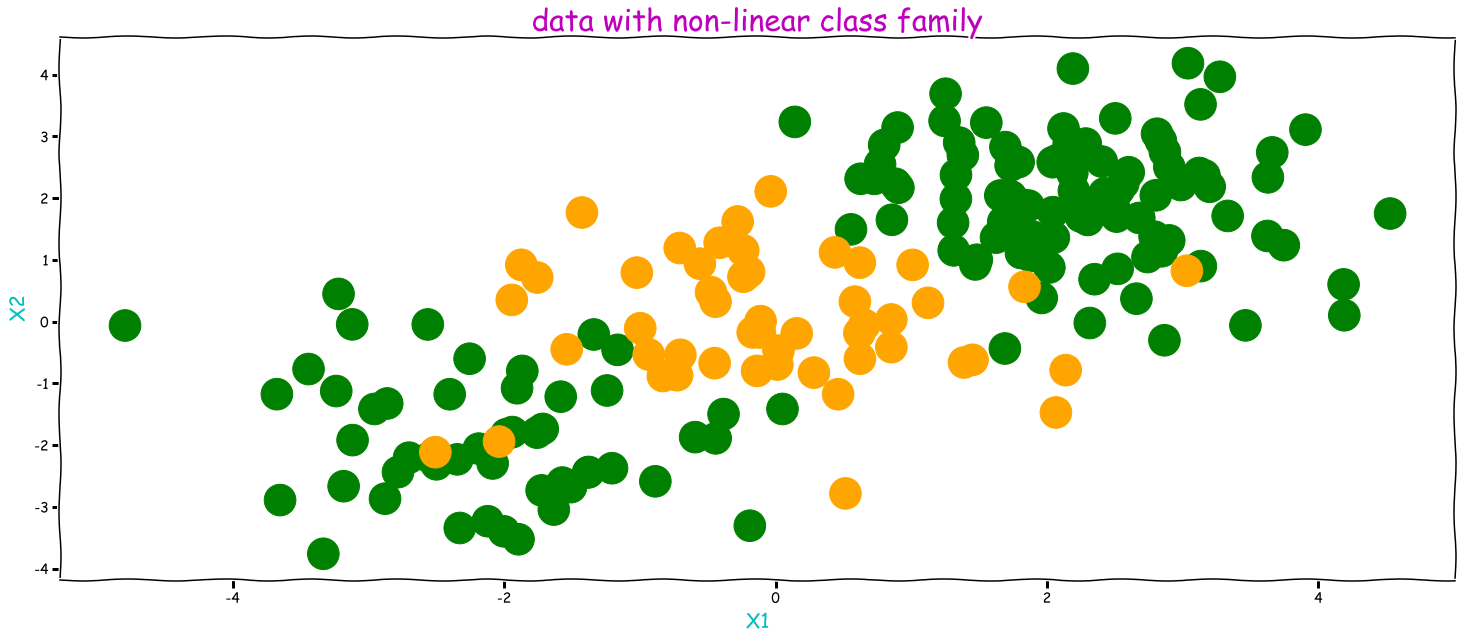

In [18]:
X = np.random.normal(size=(200,2))
X[:100] += 2
X[100:150] -= 2
y = np.concatenate([1*np.ones((150,)), np.zeros((50,))])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(X[:, 0], X[:, 1], c=['green' if val==1 else 'orange' for val in y], marker='o', s=1000)
plt.xlabel('X1', color='c', fontsize=20)
plt.ylabel('X2', color='c', fontsize=20)
plt.title('data with non-linear class family', color='m', fontsize=30)

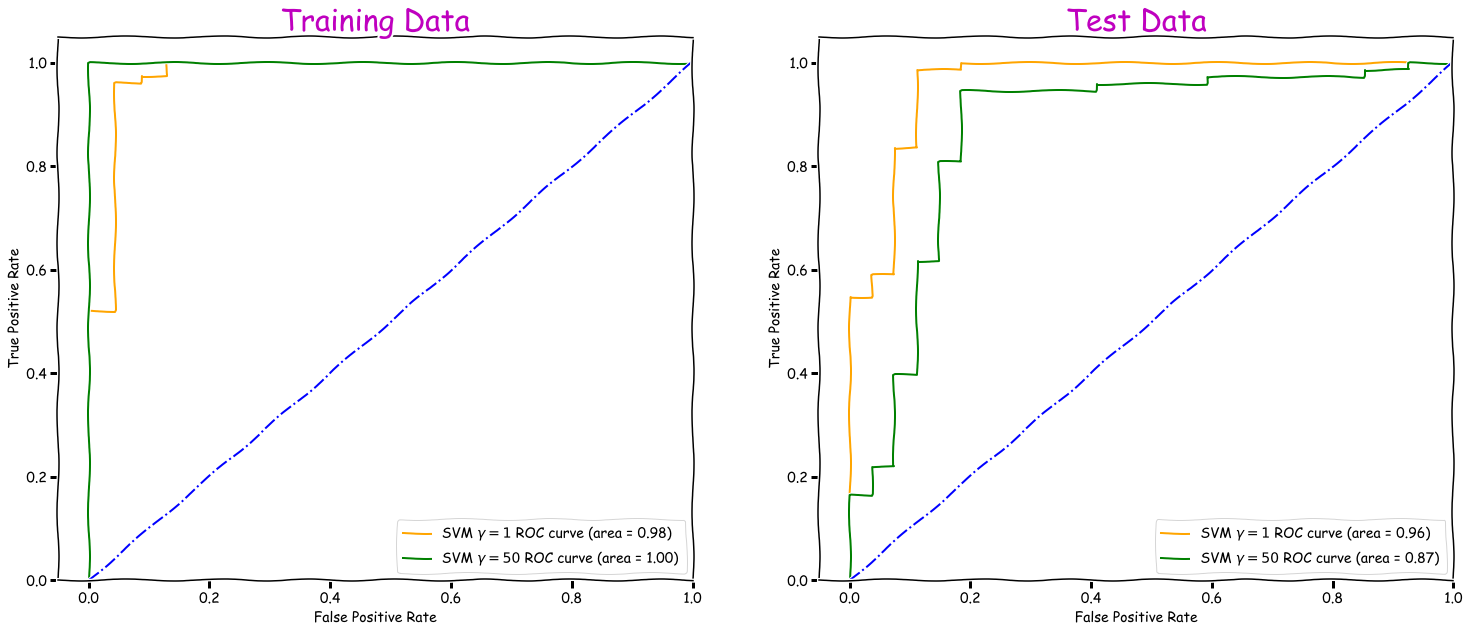

In [50]:
# less flexible model
svmfit1 = SVC(C=1, kernel='rbf', gamma=1).fit(X_train, y_train)
y_train_score1 = svmfit1.decision_function(X_train)

# more flexible model
svmfit50 = SVC(C=1, kernel='rbf', gamma=50).fit(X_train, y_train)
y_train_score50 = svmfit50.decision_function(X_train)

false_pos_rate1, true_pos_rate1, _ = roc_curve(y_train, y_train_score1)
roc_auc1 = auc(false_pos_rate1, true_pos_rate1)

false_pos_rate50, true_pos_rate50, _ = roc_curve(y_train, y_train_score50)
roc_auc50 = auc(false_pos_rate50, true_pos_rate50)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(25, 10))
ax1.plot(false_pos_rate1, true_pos_rate1, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc1, color='orange')
ax1.plot(false_pos_rate50, true_pos_rate50, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc50, color='green')
ax1.set_title('Training Data', color='m', fontsize=30)

y_test_score1 = svmfit1.decision_function(X_test)
y_test_score50 = svmfit50.decision_function(X_test)

false_pos_rate1, true_pos_rate1, _ = roc_curve(y_test, y_test_score1)
roc_auc1 = auc(false_pos_rate1, true_pos_rate1)

false_pos_rate50, true_pos_rate50, _ = roc_curve(y_test, y_test_score50)
roc_auc50 = auc(false_pos_rate50, true_pos_rate50)

ax2.plot(false_pos_rate1, true_pos_rate1, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc1, color='orange')
ax2.plot(false_pos_rate50, true_pos_rate50, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc50, color='green')
ax2.set_title('Test Data', color='m', fontsize=30)

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'blue', ls='-.')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")